In [1]:
from netCDF4 import Dataset
import wrf
import cmocean.cm as cmo

import cartopy.crs as crs
import matplotlib.pyplot as plt

In [2]:
# Open the NetCDF file
ncfile = Dataset('/home/cdonnely/WRF-model/WRF/run/wrfout_d01_2024-04-19_00:00:00')
ncfile2 = Dataset('/home/cdonnely/WRF-model/WRF/run/wrfout_d02_2024-04-19_00:00:00')

In [3]:
tc = wrf.getvar(ncfile, "T2")
tc2 = wrf.getvar(ncfile2, "T2")

tc2

<xarray.DataArray 'T2' (south_north: 120, west_east: 120)> Size: 58kB
array([[279.9161 , 279.8982 , 279.88043, ..., 277.2141 , 277.12183,
        277.03375],
       [279.95593, 279.94016, 279.92465, ..., 277.21948, 277.12054,
        277.02612],
       [279.99582, 279.98218, 279.96887, ..., 277.22495, 277.1196 ,
        277.01883],
       ...,
       [281.78976, 281.78906, 281.7887 , ..., 278.81305, 278.80383,
        278.794  ],
       [281.78683, 281.78583, 281.78525, ..., 278.83887, 278.82922,
        278.8189 ],
       [281.78375, 281.78253, 281.78165, ..., 278.8662 , 278.85605,
        278.84534]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 58kB 3.369 3.405 ... 7.853 7.892
    XLAT     (south_north, west_east) float32 58kB 50.53 50.53 ... 53.25 53.24
    XTIME    float32 4B 0.0
    Time     datetime64[ns] 8B 2024-04-19
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=4.550000190734863, moad_cen_lat=...

In [4]:
# Get the latitude and longitude points
lats, lons = wrf.latlon_coords(tc)
lats2,lons2 = wrf.latlon_coords(tc2)

# Get the cartopy mapping object (use original data, rather than any processed data)
cart_proj = wrf.get_cartopy(tc)

/home/cdonnely/wrf-analysis/.venv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/home/cdonnely/wrf-analysis/.venv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


Text(0.5, 1.0, 'TEMP at 2 M\n2024-04-19T00:00:00.000000000')

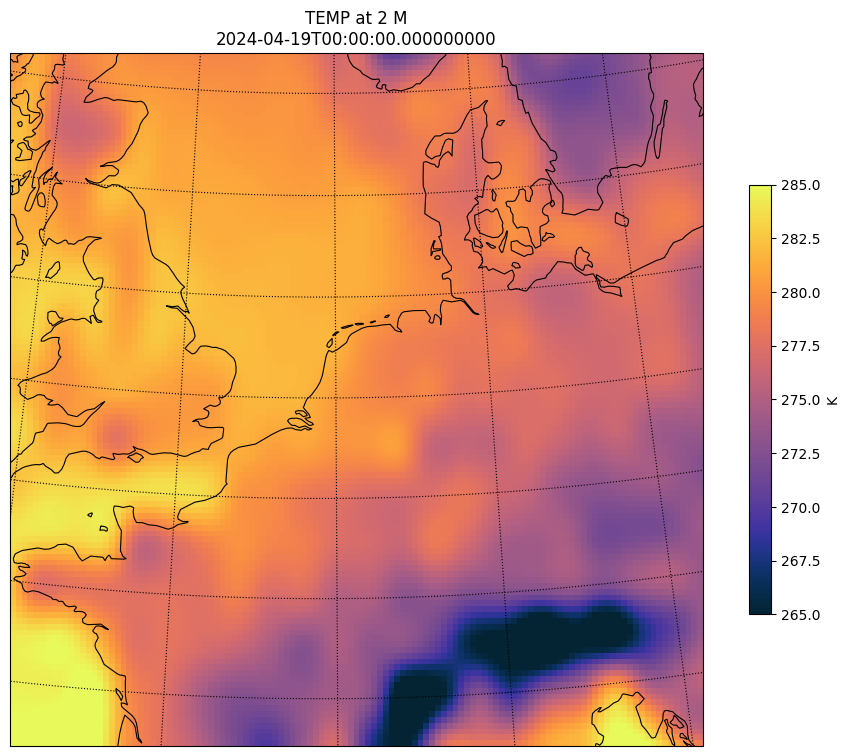

In [5]:
# Create a figure
fig = plt.figure(figsize=(12,9))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)

# Plot contours
plt.pcolormesh(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(tc), 
                transform=crs.PlateCarree(), cmap=cmo.thermal, vmin=265, vmax=285)

plt.pcolormesh(wrf.to_np(lons2), wrf.to_np(lats2), wrf.to_np(tc2), 
                transform=crs.PlateCarree(), cmap=cmo.thermal, vmin=265, vmax=285)

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.62)
cbar.set_label(tc.units)

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(tc.description+'\n'+str(tc.Time.values))